In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/Dharniha V/Downloads/Paper2/Sentiment.csv")
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [9]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Dharniha
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Q1. Print the total number of positive and negative sentiments

In [8]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

# Q2. Build a sequential LSTM model to predict positive and negative sentiments

In [11]:
df = df.drop_duplicates()
df.groupby('sentiment').describe()

id                                                           \
            count         mean          std  min      25%     50%      75%   
sentiment                                                                    
Negative   8493.0  7151.127517  4039.904226  7.0  3593.00  7336.0  10693.0   
Neutral    3142.0  6359.836728  3835.045590  1.0  3170.75  6001.0   9500.5   
Positive   2236.0  6928.498658  4023.119457  2.0  3522.00  7029.0  10251.0   

                   candidate_confidence            ... retweet_count          \
               max                count      mean  ...           75%     max   
sentiment                                          ...                         
Negative   13870.0               8493.0  0.870794  ...          50.0  4965.0   
Neutral    13847.0               3142.0  0.811803  ...          19.0  3847.0   
Positive   13871.0               2236.0  0.859983  ...          66.0  4270.0   

          tweet_id                                                          \
             count          mean           std           min           25%   
sentiment                                                                    
Negative    8493.0  6.295990e+17  9.748069e+13  6.294531e+17  6.294850e+17   
Neutral     3142.0  6.296230e+17  9.064329e+13  6.294708e+17  6.294929e+17   
Positive    2236.0  6.296075e+17  9.532214e+13  6.294626e+17  6.294871e+17   

                                                     
                    50%           75%           max  
sentiment                                            
Negative   6.296710e+17  6.296878e+17  6.297017e+17  
Neutral    6.296760e+17  6.296893e+17  6.297014e+17  
Positive   6.296728e+17  6.296880e+17  6.297010e+17  

[3 rows x 56 columns]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['text'])
y = df['sentiment']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [23]:
x = vectorizer.fit_transform(df['text'])
y = df['sentiment']

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3577,  430,  245],
       [ 931,  504,  138],
       [ 458,  137,  516]], dtype=int64)

In [45]:
matrix=confusion_matrix(y_test,y_pred)


Text(0.5, 15.0, 'Negative')

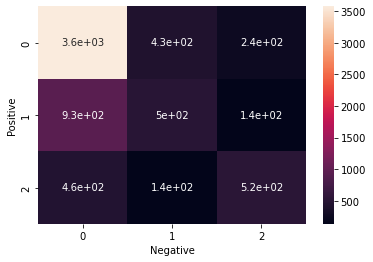

In [50]:
a=sns.heatmap(matrix,annot=True)
a.set_ylabel("Positive")
a.set_xlabel("Negative")

In [25]:
model.score(x_test, y_test)

0.6627739331026529

# Q3.Based on the model, check the sentiment for the following two sentences   a. 'He is a great leader.'


In [51]:
y_pred=model.predict(x_test)
model.predict_proba(x_test)

array([[0.86288411, 0.05647915, 0.08063674],
       [0.83096868, 0.14149575, 0.02753557],
       [0.93219276, 0.04591721, 0.02189004],
       ...,
       [0.32945149, 0.10267396, 0.56787455],
       [0.98804667, 0.00716573, 0.0047876 ],
       [0.78620359, 0.10567384, 0.10812256]])

In [52]:
review = 'He is a great leader'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.18188071936596023

# b. 'He is a terrible leader.

In [53]:
review = 'He is a terrible leader'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.16998195190774162

value for last one is lower than previous sentence ie., last one is less positive than first one